<a href="https://colab.research.google.com/github/epapoutsellis/blogs/blob/main/CIL_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>CIL on the Cloud</center></h1>

In this blog, we will demonstrate how to use the Core Imaging Library (CIL), an open source software for imaging inverse problems, on cloud platforms like Binder and Google Colab. These platforms offer cloud-based environments with pre-installed packages and resources, making them highly suitable for teaching and training purposes. In addition, if you do not have a GPU or you are a macOS user without GPU or without the right GPU these cloud platforms serve as an excellent alternative. Or maybe you lost connection to your Windows/Linux remote machines and you really want to reconstruct a tomographic dataset.

## Outline
* [What is CIL?](#section1)
* [Cloud platforms: Google Colab and Binder](#section2)
    * [Binder or Colab](#subsection21)
* [Install CIL on Colab](#section3) 
    * [Check Python version](#subsection31)
    * [Install TIGRE](#subsection32)
    * [Install CondaColab](#subsection33)
    * [Install Conda](#subsection34)
    * [Install CIL](#subsection35)
* [Tomography reconstruction using CIL](#section4)     
    * [Import CIL](#subsection41) 
    * [Import Tomography backends](#subsection42) 
    * [Load and examine real 3D dataset](#subsection43) 
    * [Preprocess Acquisition Data](#subsection44) 
    * [Run analytic reconstruction: FBP using Astra and Tigre](#subsection45) 
    * [Run Model-Based iterative reconstruction: Total variation reconstruction](#subsection46) 
    * [Discussion](#subsection47) 
* [CIL Demos on Colab](#section5)  
    

## What is CIL?  <a class="anchor" id="section1"></a>

The Core Imaging Library or CIL is an open-source Python framework for solving inverse problems in imaging with particular emphasis on tomographic imaging and reconstruction. It is supported by the [Collaborative Computational Project in Tomographic Imaging (CCPi)](https://ccpi.ac.uk/), a UK academic network, which unites expertise in the field of Computed Tomography (CT). Its aim is to provide the community with software to increase the quality and level of information that can be extracted by CT, with an emphasis in software sustainability, maintainability and distribution. 

To learn more about CIL, please check the links below.

- **Github Repositories** 
    - [CIL](https://github.com/TomographicImaging/CIL)
    - [CIL-Demos](https://github.com/TomographicImaging/CIL-Demos)
- **Software Papers**
    - [Core Imaging Library--Part I: a versatile Python framework for tomographic imaging](https://royalsocietypublishing.org/doi/abs/10.1098/rsta.2020.0192). [Code](https://github.com/TomographicImaging/Paper-2021-RSTA-CIL-Part-I)
    - [Core Imaging Library--Part II: Multichannel reconstruction for dynamic and spectral tomography](https://royalsocietypublishing.org/doi/abs/10.1098/rsta.2020.0193). [Code](https://github.com/TomographicImaging/Paper-2021-RSTA-CIL-Part-II)
- **Talks and Posters**
    - [PyCon DE & PyData Berlin 2022](https://www.youtube.com/watch?v=Xd4erPj0uEs)
    - [STEM for Britain Poster, Finalist Mathematics Section, 2020](https://epapoutsellis.github.io/assets/pdf/poster_STEM_for_Britain.pdf)
    - [Augmented Reality Poster](https://editor.postreality.io/view/addf28cc-2830-11ec-966e-d792f7fbd6cb)

To join the CIL community, you can register at our [Discord channel](https://discord.com/invite/9NTWu9MEGq).


## Cloud platforms <a class="anchor" id="section2"></a>

In addition to the local installation available via conda, see [here](https://github.com/TomographicImaging/CIL#installation-of-cil), we have two alternatives to use CIL on the cloud: 1) Binder and 2) Google Colab.

* Binder: The [Binder Project](https://mybinder.readthedocs.io/en/latest/#) is an open community that makes it possible to create sharable, interactive, reproducible environments that can be shared and used by many remote users. Using the [mybinder.org](https://mybinder.org/) platform we transform a github repository into a collection of interactive notebooks without any installation. So, you are one click away from our CIL demos: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/TomographicImaging/CIL-Demos/HEAD?urlpath=lab/tree/binder%2Findex.ipynb)

* Google Colab: Google Colaboratory, or "Colab" is a cloud-based Jupyter notebook environment. It runs on Google Cloud Platform (GCP), and provides free access to GPUs and TPUs with many pre-installed scientific libraries.

## Binder or Colab <a class="anchor" id="subsection21"></a>

In my opinion, the easiest choice to check some interactive jupyter demos and see the interface of an open source software, is Binder. However, in this case only CPU is available which is not the best option for tomography imaging. Also, you have limited memory and space if you want to upload some tomography datasets. A couple years ago, Binder was quite fast when building your image and if the image was recently built you could see the interactive demos in less than one minute. Nowdays, Binderhub servers have a lot of activity with many users and requesting a server can take a lot of time and sometimes you will receive a message such as : _Found built image, launching... Too many users on this BinderHub! Try again soon._. 

In the case of Colab, we have the option of a free GPU up to 16Gb, which is very useful for tomography imaging and reconstruction. Also, you can upload some datasets to your personal google drive. However, CIL or other packages are not pre-installed in you jupyter environment. Therefore, we need to use `pip` or `conda` to install our software. Pip is the default option to install python libraries on Google Colab, e.g., `!pip install name_of_package`. Unfortunately, Conda is not available by default and we need to install it first and then use it, e.g., `!conda install name_of_package`.

**Please note that Colab has recently upgraded its default runtime to Python version 3.10.**
The next version of Python (3.11) is scheduled to have its final regular bug fix release in April 2024. Previous version (Python 3.9) is available from the `Command Palette` (`Ctrl+Shift+P`) via the `Use fallback runtime version` command when connected to a runtime. This will be available until mid-May 2023. See [here](https://medium.com/google-colab/colab-updated-to-python-3-10-27eb02daa162) for more information.

## Install CIL on Colab <a class="anchor" id="section3"></a>

In this section, we discuss how to install CIL and all its dependencies on Google Colab required for this notebook. In CIL, we provide wrappers for two tomography backends: 1) [Astra-Toolbox](https://github.com/astra-toolbox/astra-toolbox) and 2) [TIGRE](https://github.com/CERN/TIGRE). In addition, we are going to use the [CCPi-Regularisation-Toolkit](https://github.com/vais-ral/CCPi-Regularisation-Toolkit) which provides a set of 2D/3D regularisation methods with CPU/GPU acceleration. We follow the installation steps below:

1) Check python version on your current jupyter session. It should be `Python >=3.10`.

2) Install TIGRE tomography backend following similar steps to [Python installation]( https://github.com/CERN/TIGRE/blob/master/Frontispiece/python_installation.md).

2) Install the [condacolab](https://github.com/conda-incubator/condacolab) package. This is the easiest way to install install `conda` on google colab.

3) Import `condacolab` and install `conda`.

5) Install CIL with the Astra-Toolbox backend and the CCPi-Regularisation Toolkit using `conda`.

You can try this notebook directly on Google Colab. 

### Check Python version <a class="anchor" id="subsection31"></a>

In [1]:
!python --version

Python 3.10.11


### Install TIGRE <a class="anchor" id="subsection32"></a>

In [2]:
!git clone https://github.com/CERN/TIGRE.git
%cd TIGRE/Python
!python setup.py install
!python example.py

Cloning into 'TIGRE'...
remote: Enumerating objects: 11520, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 11520 (delta 64), reused 107 (delta 53), pack-reused 11391
Receiving objects: 100% (11520/11520), 156.97 MiB | 27.57 MiB/s, done.
Resolving deltas: 100% (8473/8473), done.
/content/TIGRE/Python
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/pytho

### Install CondaColab <a class="anchor" id="subsection33"></a>

In [3]:
!pip install -q condacolab

In [4]:
import condacolab

### Install Conda <a class="anchor" id="subsection34"></a>

**Note:** Please wait for the kernel to restart.

In [5]:
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


### Install CIL <a class="anchor" id="subsection35"></a>

Using the command below we install CIL, Astra-Toolbox and the CCPi-Regularisation toolkit via `conda` or `mamba`. We are going to use [Mamba](https://github.com/mamba-org/mamba), a fast cross-platform package manager from [Quantstack](https://quantstack.net/). 

In [1]:

!mamba install -c conda-forge -c intel -c ccpi cil=23.0.1 astra-toolbox ccpi-regulariser "ipywidgets<8" --quiet
!cp -r /usr/local/lib/python3.10/site-packages/astra_toolbox-2.0.0-py3.10-linux-x86_64.egg/astra /usr/local/lib/python3.10/site-packages/


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... By downloading and using the CUDA Toolkit conda packages, you accept the terms and conditions of the CUDA End User License Agreement (EULA): https://docs.nvidia.com/cuda/eula/index.html

done


### Check CIL version

In [2]:
import cil.version
print(cil.version.version)

23.0.1


## Tomography reconstruction using CIL <a class="anchor" id="section4"></a>

We are now ready to use CIL to perform tomography reconstruction on a real tomography dataset.

### Limited Angle Tomography Reconstruction

We are going to use a three-dimensional parallel-beam X-ray CT real dataset from Beamline I13-2, Diamond Light Source, Harwell, UK. 

The sample consisted of a 0.5 mm aluminium cylinder with a piece of steel wire embedded in a small drilled hole. A droplet of salt water was placed on top, causing corrosion to form hydrogen bubbles. The dataset, which was part of a fast time-lapse experiment, consists of 91 projections over 180, originally acquired as size 2560-by-2160 pixels, and it is downsampled to 160-by-135 pixels see [here](https://github.com/DiamondLightSource/Savu/blob/master/test_data/data/24737_fd.nxs).

We reconstruct this dataset using analytic and iterative reconstruction methods with a limited number of projections:

* the Filtered Back Projection (FBP) algorithm,

* Total variation (TV) regularisation under a non-negativity constraint

    <a class="anchor" id="tv_reg"></a>
    \begin{equation}
    \underset{u}{\operatorname{argmin}} \frac{1}{2} \| A u - d\|^{2}_{2} + \alpha\,\mathrm{TV}(u) + \mathbb{I}_{\{u\geq0\}}(u)    
    \tag{1}
    \end{equation}

    where, $d$ is the noisy sinogram and $A$ is the Projection operator.

### Import libraries <a class="anchor" id="subsection41"></a>

In [5]:
from cil.framework import  AcquisitionGeometry
from cil.processors import TransmissionAbsorptionConverter, Slicer, CentreOfRotationCorrector
from cil.optimisation.functions import L2NormSquared
from cil.optimisation.algorithms import PDHG
from cil.utilities.display import show2D, show_geometry
from cil.utilities import dataexample
from cil.utilities.jupyter import islicer
from cil.plugins.ccpi_regularisation.functions import FGP_TV

import matplotlib.pyplot as plt

import numpy as np

### Import tomography backends: ASTRA and TIGRE <a class="anchor" id="subsection42"></a>

In [6]:
# Astra Backend
from cil.plugins.astra import ProjectionOperator as AstraProjectionOperator
from cil.plugins.astra import FBP as AstraFBP

# TIGRE backend
from cil.plugins.tigre import ProjectionOperator as TigreProjectionOperator
from cil.plugins.tigre import FBP as TigreFBP

### Load and examine dataset <a class="anchor" id="subsection43"></a>

In [19]:
# data_raw = dataexample.SYNCHROTRON_PARALLEL_BEAM_DATA.get() # local installation
data_raw = dataexample.SYNCHROTRON_PARALLEL_BEAM_DATA.get(data_dir = "/usr/local/share/cil") # google colab 

### Preprocess Acquisition Data <a class="anchor" id="subsection44"></a>

In the code above, we preprocess our acquired data:

- Convert to Absorption using the [Beer-Lambert](https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law) law.
- Correct for centre of rotation artifacts.
- Simulate a limited angled tomography dataset. Our raw data has 91 projections, but we are going to use only 15 of them.

In [20]:
background = data_raw.get_slice(vertical=20).mean()
data_raw /= background

# Lambert-Beer law
data_abs = TransmissionAbsorptionConverter()(data_raw)
data_crop = Slicer(roi={'vertical': (1, None)})(data_abs)

# Reorder the shape of sinogram only if astra backend is used
data_crop.reorder(order='astra')

# Correct centre of rotation artifacts
data_centred = CentreOfRotationCorrector.xcorrelation()(data_crop)

# Reduce number of projections
data_sliced = Slicer(roi={'angle': (0, 90, 6), 'horizontal': (20,140,1)})(data_centred)

# Get acquisition geometry
ag = data_sliced.geometry

# Get image geometry
ig = ag.get_ImageGeometry()


### Show Acquisition Geometry

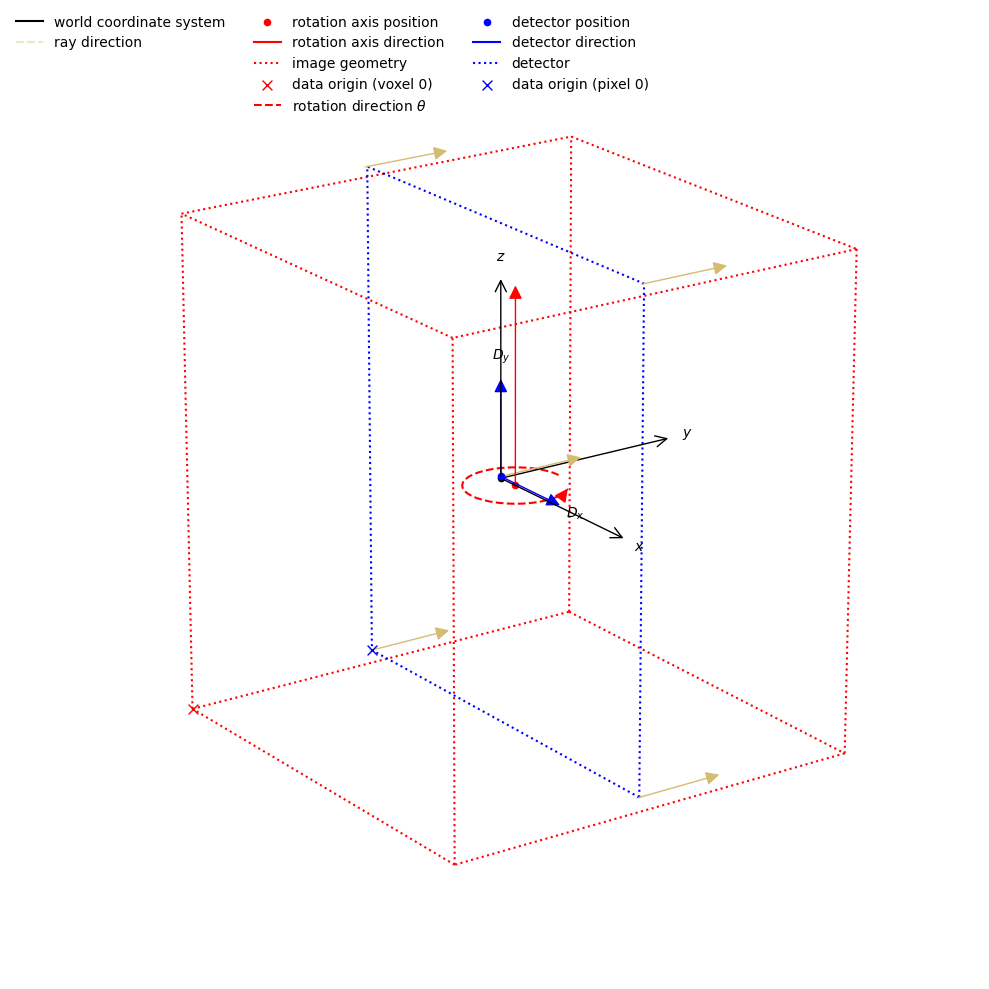

In [21]:
show_geometry(ag)

### Run analytic reconstruction: FBP using Astra and Tigre <a class="anchor" id="subsection45"></a>

In [22]:
data_sliced.reorder('tigre')
fbp_recon_tigre = TigreFBP(ig, ag, device='gpu')(data_sliced)

data_sliced.reorder('astra')
fbp_recon_astra = AstraFBP(ig, ag, device='gpu')(data_sliced)

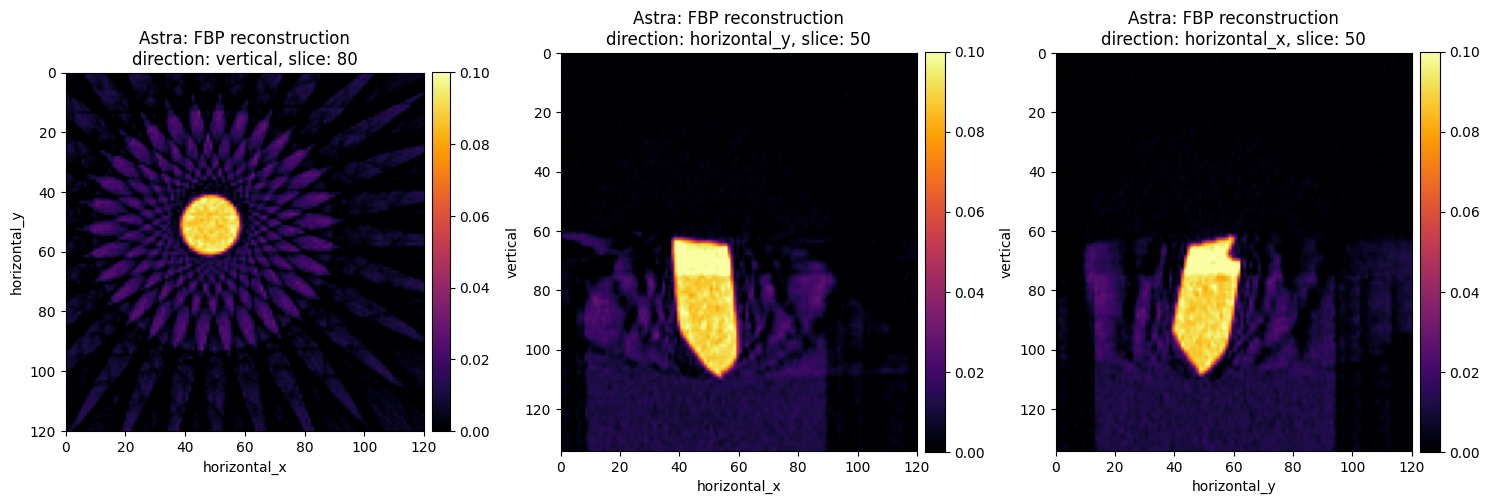

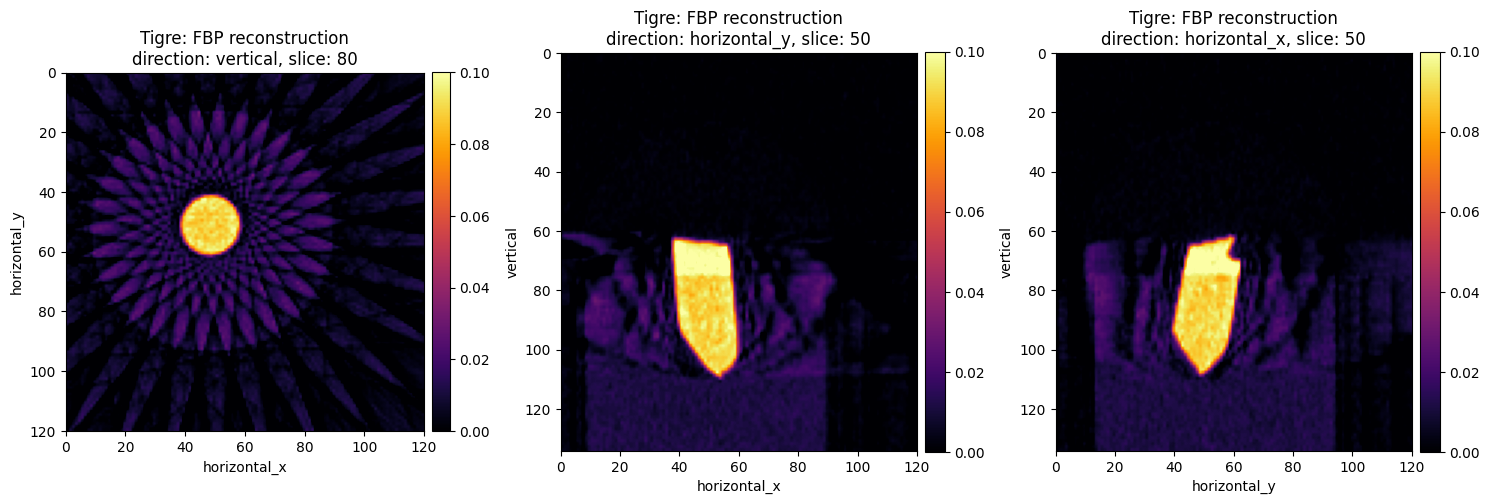

In [23]:
# visualise reconstruction results
show2D(fbp_recon_astra, slice_list=[('vertical',80), 
                              ('horizontal_y',50), 
                              ('horizontal_x',50)], \
        cmap="inferno", num_cols=3, size=(15,15), title="Astra: FBP reconstruction", 
       fix_range = (0,0.1),
       origin='upper-left')

show2D(fbp_recon_tigre, slice_list=[('vertical',80), 
                              ('horizontal_y',50), 
                              ('horizontal_x',50)], \
        cmap="inferno", num_cols=3, size=(15,15), title="Tigre: FBP reconstruction", 
       fix_range = (0,0.1),
       origin='upper-left')


### Run Model-Based iterative reconstruction: Total variation reconstruction <a class="anchor" id="subsection46"></a>

The images on the first column are perfect if you are interested to very cool and futuristic star-shaped art. If we examine other slices they are far from perfect for tomography reconstruction. These artifacts are well known when we use analytic reconstruction algoritms on data with a limited number of projections, see [Core Imaging Library--Part I: a versatile Python framework for tomographic imaging](https://royalsocietypublishing.org/doi/abs/10.1098/rsta.2020.0192). 

To reduce these artifacts, we are going to use **Model-Based Iterative Reconstruction (MBIR)** algorithms. We use the [Primal-Dual Hybrid Gradient (PDHG)](https://link.springer.com/article/10.1007/s10851-010-0251-1)
with [Total Variation (TV)](https://en.wikipedia.org/wiki/Total_variation) regularisation under a non-negativity constraint.

The PDHG algorithm solves the following problem:

<a id='pdhg_alg'></a>
\begin{equation}
\underset{x\in \mathbb{X} }{\operatorname{argmin}} f(Kx) + g(x)
\tag{2}
\end{equation}

which is the sum of a composite function $f$ with a linear operator $K$ and a proximable function $g$. 

So, in order to use the PDHG algorithm in CIL, we need to find the triplet $(f, g, K)$ in order to express the minimisation problem [(1)](#tv_reg) to the general PDHG form [(2)](#pdhg_alg).

- In our case, we have $K=A$, i.e., our Astra projection operator `A = AstraProjectionOperator(ig, ag, device="gpu")` **Note: cpu option is not available for the TIGRE backend**

- The first term in [(1)](#tv_reg), also called **fidelity term**, is $f(u) = \frac{1}{2}\|Au - d\|^{2}$ and in CIL syntax, is `F = LeastSquares(A=A, b=data_centred, c=0.5)`

- The second term in [(1)](#tv_reg) is the TV **regulariser** with a non-negativity constraint and in CIL syntax is `G = alpha * FGP_TV(nonnegativity=True, device = "gpu")`, where `alpha` is the regularisation parameter. 

Now, it is time to run the PDHG algorithm, for 100 iterations. We can initialise our algorithm from an array of zeros, `ig.allocate()` or the previous FBP reconstruction. We also print the objective of the primal problem every 10 iterations using `verbose=1`

In [24]:
# Projection Operator
A = AstraProjectionOperator(ig, ag, device="gpu")

# Fidelity term
F = 0.5*L2NormSquared(b=data_sliced)

# TV regularization
alpha = 0.2
G = alpha * FGP_TV(nonnegativity=True, device = "gpu")

# setup and run PDHG algorithm
pdhg = PDHG(initial=fbp_recon_astra, f=F, g=G, operator=A, 
            update_objective_interval=10,max_iteration=100)
pdhg.run(verbose=1)

/usr/local/lib/python3.10/site-packages/cil/optimisation/algorithms/PDHG.py:408: UserWarning: Convergence criterion of PDHG for scalar step-sizes is not satisfied.
  warnings.warn("Convergence criterion of PDHG for scalar step-sizes is not satisfied.")


     Iter   Max Iter     Time/Iter            Objective
                               [s]                     
        0        100         0.000          3.19317e+03
       10        100         0.565          2.43740e+02
       20        100         0.364          2.18892e+02
       30        100         0.302          2.13443e+02
       40        100         0.271          2.11901e+02
       50        100         0.247          2.10801e+02
       60        100         0.229          2.10449e+02
       70        100         0.216          2.10293e+02
       80        100         0.207          2.10210e+02
       90        100         0.199          2.10180e+02
      100        100         0.193          2.10170e+02
-------------------------------------------------------
      100        100         0.193          2.10170e+02
Stop criterion has been reached.



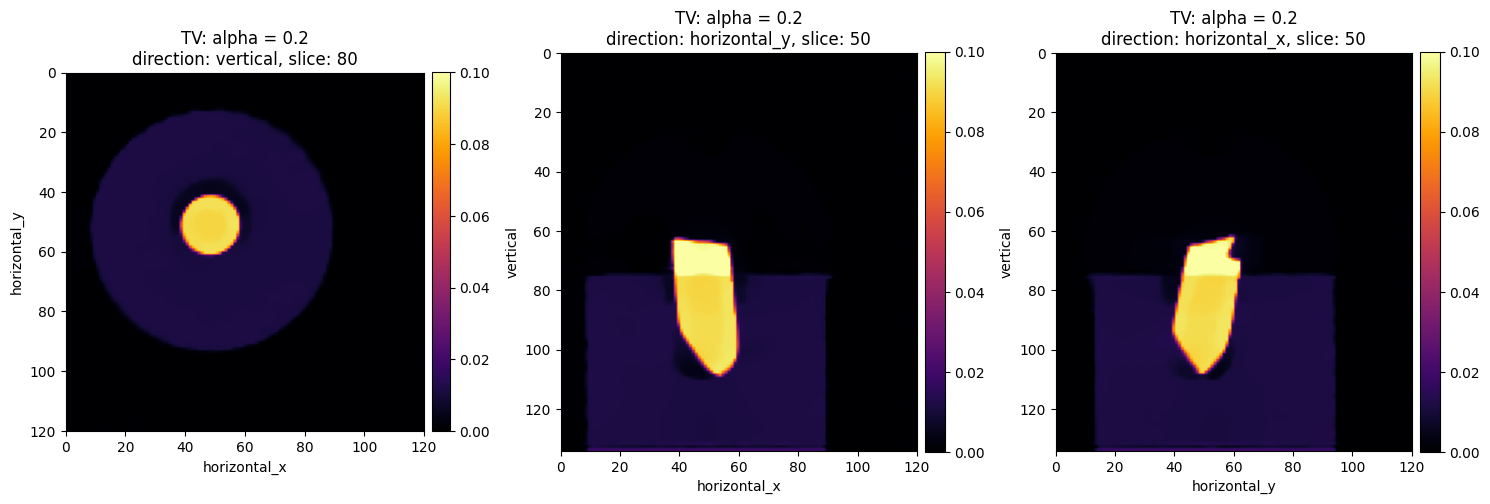

In [25]:
show2D(pdhg.solution, slice_list=[('vertical',80), 
                              ('horizontal_y',50), 
                              ('horizontal_x',50)], \
        cmap="inferno", num_cols=3,title="TV: alpha = {}".format(alpha),
        fix_range=(0,0.1), origin='upper')

## Discussion

Using the iterative reconstruction approach, we successfully eliminated the noise and streak artifacts from our initial analytic reconstruction. However, in order to determine whether the resulting reconstruction is good or bad requires further evaluation and assessment. For this particular dataset, we can perform the following comparison. We can reconstruct our dataset using all 91 projections with the FBP algorithm and compare it with our TV reconstructed image.

In [26]:
data_full = Slicer(roi={'horizontal': (20,140,1)})(data_centred)
ag_full = data_full.geometry
ig_full = ag_full.get_ImageGeometry()
fbp_full_astra = AstraFBP(ig_full, ag_full, device='gpu')(data_full)

In [27]:
all_recons = [fbp_full_astra.get_slice(vertical=80), fbp_recon_astra.get_slice(vertical=80), pdhg.solution.get_slice(vertical=80),
              fbp_full_astra.get_slice(horizontal_y=50), fbp_recon_astra.get_slice(horizontal_y=50), pdhg.solution.get_slice(horizontal_y=50),
              fbp_full_astra.get_slice(horizontal_x=50), fbp_recon_astra.get_slice(horizontal_x=50), pdhg.solution.get_slice(horizontal_x=50)]

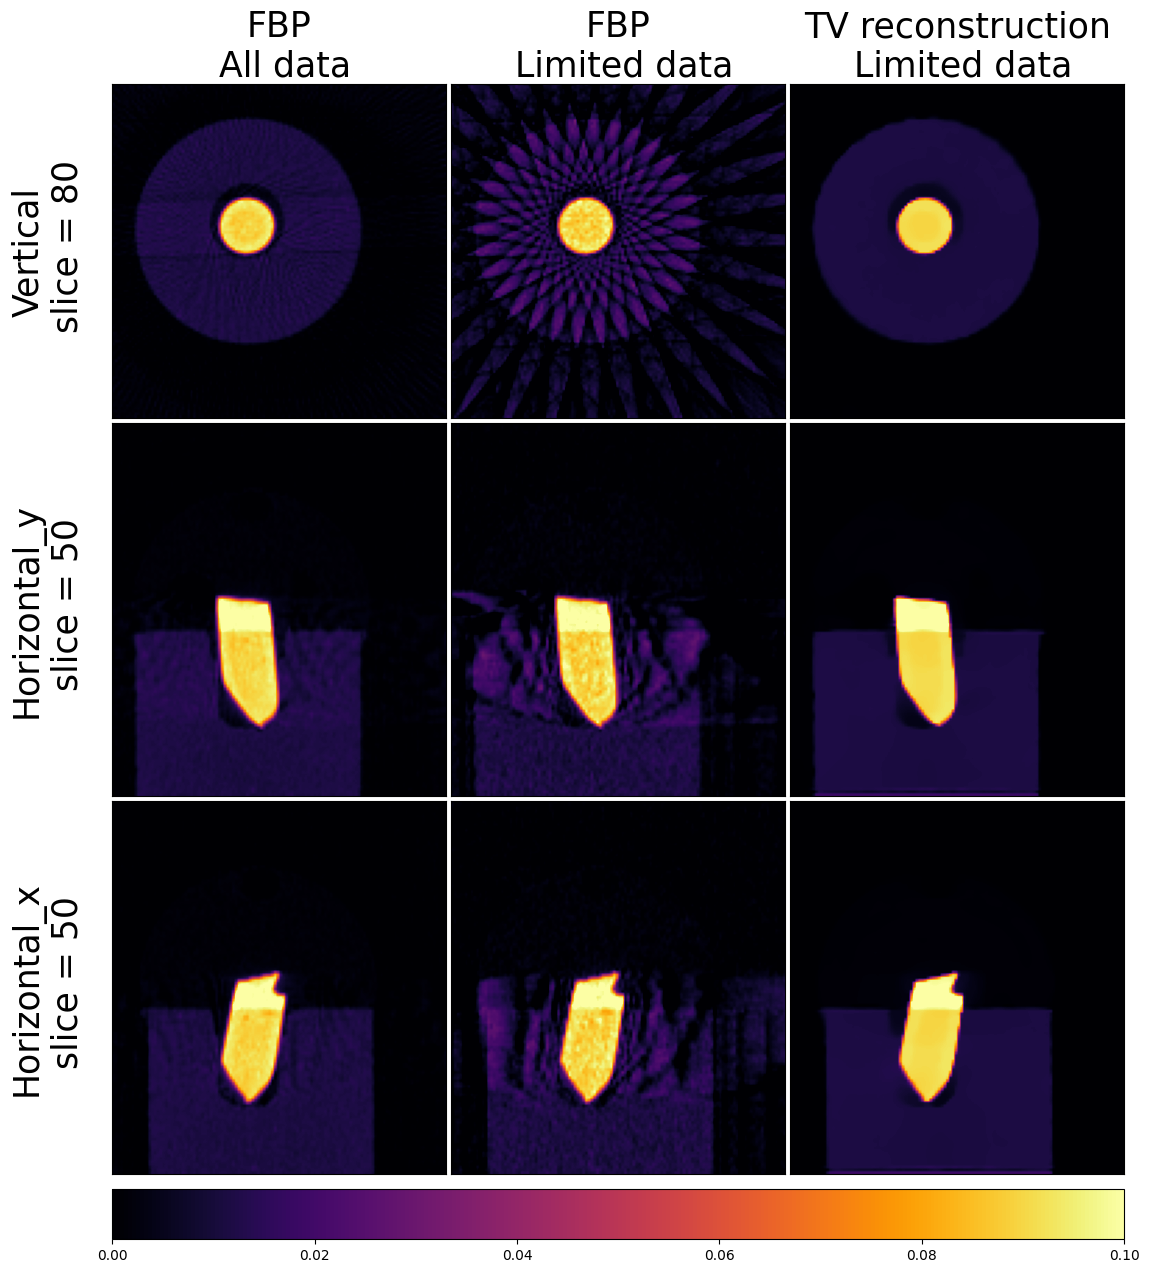

In [28]:
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar     

labels_x = ["FBP\n All data", "FBP\n Limited data","TV reconstruction\n Limited data"]
labels_y = ["Vertical\n slice = 80", "Horizontal_y\n slice = 50", "Horizontal_x\n slice = 50"]

fig = plt.figure(figsize=(15, 15))

grid = AxesGrid(fig, 111,
                nrows_ncols=(3, 3),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='bottom',
                cbar_size = 0.5,
                cbar_pad=0.1
                )

k = 0

for ax in grid:

    im = ax.imshow(all_recons[k].array, vmin=0, vmax=0.1, cmap="inferno")
    
    if k==0:        
        ax.set_title(labels_x[0], fontsize=25)
        ax.set_ylabel(labels_y[0],fontsize=25, labelpad=20)
        
    if k==1:
        ax.set_title(labels_x[1],fontsize=25)

    if k==2:
        ax.set_title(labels_x[2],fontsize=25)
        
    if k==3:
        ax.set_ylabel(labels_y[1],fontsize=25, labelpad=20)
        
    if k==6:
        ax.set_ylabel(labels_y[2],fontsize=25, labelpad=20)        
        
    if k==9:
        ax.set_ylabel(labels_y[3],fontsize=25, labelpad=20)           
                
    ax.set_xticks([])
    ax.set_yticks([])
    k+=1
    
cbar = ax.cax.colorbar(im)
plt.show()

## More CIL-Demos

To try more demos on Google Colab, please visit our [CIL-Demos](https://github.com/TomographicImaging/CIL-Demos) repository and load one of our notebooks to the Google Colab platform and repeat the installation steps above. Please note that for some notebooks you need to download first the dataset required to run the notebook.

